70% Ïù¥ÏÉÅ ÏÑ§Î™ÖÌïòÎäî ÏµúÏÜå Ï£ºÏÑ±Î∂Ñ Í∞úÏàò: 3
ÎàÑÏ†Å Î∂ÑÏÇ∞ ÏÑ§Î™ÖÎ†•: [0.42868853 0.61446377 0.7429523  0.82497523 0.90298757 0.96236976
 0.99195791 1.        ]

Íµ≠Í∞ÄÎ≥Ñ Ï¥ù Î∏åÎûúÎìú Í∞úÏàò ÏÉÅÏúÑ:
           country  brand_count
4            Japan           11
10  United Kingdom            8
2          Germany            6
11   United States            5
1           France            4

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ Î≥ÄÏàò Ïåç:
                  var1               var2  correlation
12  Emission_Class_num  Registration_Year     0.916073
1                Price  Registration_Year     0.786851
11  Emission_Class_num              Price     0.693813
6    Registration_Year    Previous Owners     0.516012


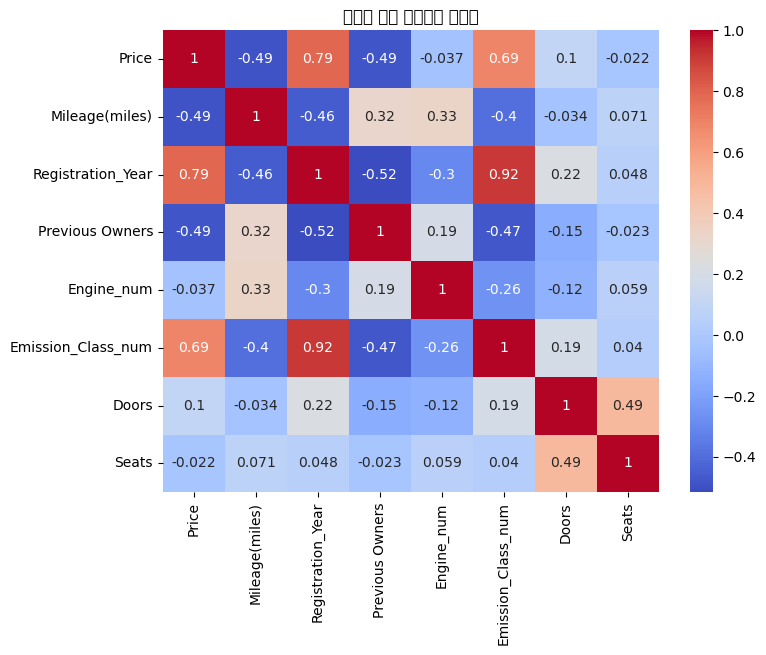

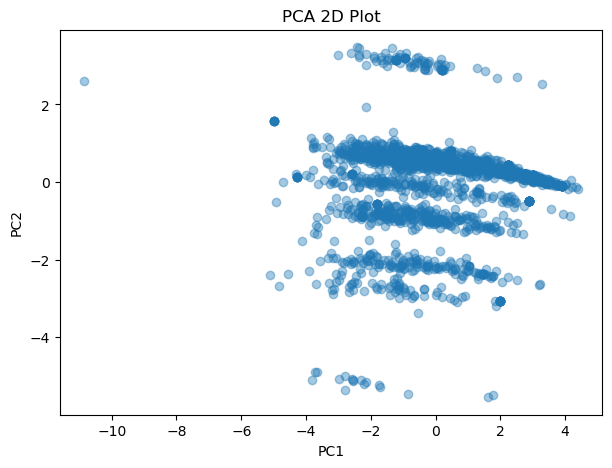

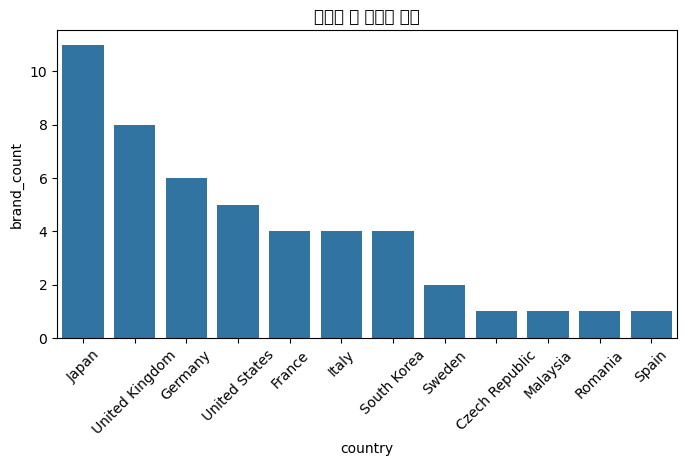

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (Í≤ΩÎ°ú ÏàòÏ†ï)
cars = pd.read_csv('C:/Users/TAEKWONLEE/Downloads/cars.csv')
brand = pd.read_csv('C:/Users/TAEKWONLEE/Downloads/brand.csv')

# 2. cars['title']ÏóêÏÑú Î∏åÎûúÎìú Ï∂îÏ∂ú Î∞è Î≥ëÌï©
cars['brand'] = cars['title'].str.split().str[0]
merged = pd.merge(cars, brand, how='left', left_on='brand', right_on=brand.columns[0])

# 3. Engine, Emission Class Îì± Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàò Ïà´ÏûêÌôî
merged['Engine_num'] = merged['Engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
merged['Emission_Class_num'] = merged['Emission Class'].str.extract(r'(\d+)').astype(float)

# 4. Service history Í≤∞Ï∏°Ïπò 'Unknown'ÏúºÎ°ú
merged['Service history'] = merged['Service history'].fillna('Unknown')

# 5. Í≤∞Ï∏°Ïπò 3Í∞ú Ïù¥ÏÉÅÏù∏ Ìñâ Ï†úÍ±∞ (Ï¶â, Í≤∞Ï∏°Ïπò 2Í∞ú Ïù¥Ìïò ÌóàÏö©)
merged_clean = merged.dropna(thresh=merged.shape[1] - 2)

# 6. Ï£ºÏöî ÏàòÏπòÌòï Î≥ÄÏàò Ï†ïÏùò
num_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 
            'Engine_num', 'Emission_Class_num', 'Doors', 'Seats']

# 7. ÏàòÏπòÌòï Î≥ÄÏàò Í≤∞Ï∏°ÏπòÎäî ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ
for col in num_cols:
    merged_clean[col] = merged_clean[col].fillna(merged_clean[col].mean())

# 8. StandardScalerÎ°ú ÏàòÏπòÌòï Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
merged_clean_scaled = merged_clean.copy()
merged_clean_scaled[num_cols] = scaler.fit_transform(merged_clean[num_cols])

# 9. PCAÎ°ú 70% Ïù¥ÏÉÅ ÏÑ§Î™ÖÌïòÎäî ÏµúÏÜå Ï£ºÏÑ±Î∂Ñ Í∞úÏàò Ï∂îÏ∂ú
X = merged_clean_scaled[num_cols]
pca = PCA().fit(X)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_70 = (cumulative_variance >= 0.7).argmax() + 1
print(f"70% Ïù¥ÏÉÅ ÏÑ§Î™ÖÌïòÎäî ÏµúÏÜå Ï£ºÏÑ±Î∂Ñ Í∞úÏàò: {n_components_70}")
print("ÎàÑÏ†Å Î∂ÑÏÇ∞ ÏÑ§Î™ÖÎ†•:", cumulative_variance)

# 10. Íµ≠Í∞ÄÎ≥Ñ Ï¥ù Î∏åÎûúÎìú Í∞úÏàò
brand_count_by_country = brand.groupby('country')[brand.columns[0]].nunique().reset_index()
brand_count_by_country.columns = ['country', 'brand_count']
print("\nÍµ≠Í∞ÄÎ≥Ñ Ï¥ù Î∏åÎûúÎìú Í∞úÏàò ÏÉÅÏúÑ:")
print(brand_count_by_country.sort_values('brand_count', ascending=False).head())

# 11. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ Î≥ÄÏàòÏåç Ï∂úÎ†•
corr = merged_clean_scaled[num_cols].corr()
high_corr = corr.abs().where(lambda x: x > 0.5).stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.rename(columns={'level_0':'var1', 'level_1':'var2', 0:'correlation'})
print("\nÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ Î≥ÄÏàò Ïåç:")
print(high_corr.sort_values('correlation', ascending=False).drop_duplicates(subset=['correlation']).head())

# --- [ÏÑ†ÌÉùÏ†Å ÏãúÍ∞ÅÌôî] ---

# (1) ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()

# (2) PCA 2D ÏãúÍ∞ÅÌôî
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)
plt.figure(figsize=(7,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], alpha=0.4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Plot')
plt.show()

# (3) Íµ≠Í∞ÄÎ≥Ñ Î∏åÎûúÎìú Í∞úÏàò barplot
plt.figure(figsize=(8,4))
sns.barplot(x='country', y='brand_count', data=brand_count_by_country.sort_values('brand_count', ascending=False))
plt.xticks(rotation=45)
plt.title("Íµ≠Í∞ÄÎ≥Ñ Ï¥ù Î∏åÎûúÎìú Í∞úÏàò")
plt.show()


In [ ]:
#Registration_YearÏôÄ Emission_Class_num Í∞ÑÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í∞ÄÏû• ÎÜíÎÑ§Ïöî! (0.92)

PriceÏôÄ Registration_YearÎèÑ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä(0.79)ÏùÑ Î≥¥ÏûÖÎãàÎã§.

#Ï§ëÍ≥†Ï∞® Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù
1. Î∏åÎûúÎìúÎ≥Ñ, Íµ≠Í∞ÄÎ≥Ñ ÏãúÏû• Î∂ÑÌè¨
ÏùºÎ≥∏ Î∏åÎûúÎìúÍ∞Ä Ï†ÑÏ≤¥ Î∏åÎûúÎìú Ï§ë Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. (Ïòà: Toyota, Honda Îì±)

ÏòÅÍµ≠, ÎèÖÏùº, ÎØ∏Íµ≠, ÌîÑÎûëÏä§ Î∏åÎûúÎìúÎèÑ Îã§Ïàò Ìè¨ÏßÑÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïù¥Îäî ÌïúÍµ≠ Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏóêÏÑúÎèÑ Ìï¥Ïô∏ Î∏åÎûúÎìúÍ∞Ä Îß§Ïö∞ Îã§ÏñëÌïòÍ≤å Í±∞ÎûòÎêòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

Íµ≠Í∞ÄÎ≥Ñ Î∏åÎûúÎìú Í∞úÏàò Top 5

ÏùºÎ≥∏: 11Í∞ú

ÏòÅÍµ≠: 8Í∞ú

ÎèÖÏùº: 6Í∞ú

ÎØ∏Íµ≠: 5Í∞ú

ÌîÑÎûëÏä§: 4Í∞ú

2. Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
**Ïó∞Ïãù(Registration_Year)**Í≥º **Î∞∞Ï∂úÍ∞ÄÏä§ Îì±Í∏â(Emission_Class_num)**Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Îß§Ïö∞ ÎÜíÏùå (0.92)

ÏµúÏã† Ïó∞ÏãùÏùºÏàòÎ°ù Î∞∞Ï∂úÍ∞ÄÏä§ Îì±Í∏âÏù¥ ÎÜíÏùÄ(ÌôòÍ≤Ω Í∏∞Ï§ÄÏù¥ ÏóÑÍ≤©Ìï¥ÏßÑ) Ï∞®ÎüâÏù¥ ÎßéÎã§Îäî ÏùòÎØ∏.

**Ï∞®Îüâ Í∞ÄÍ≤©(Price)**Í≥º Ïó∞Ïãù(Registration_Year), Î∞∞Ï∂úÍ∞ÄÏä§ Îì±Í∏âÍ≥ºÎèÑ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(0.79, 0.69)

ÏµúÏã† Ïó∞Ïãù, ÏπúÌôòÍ≤Ω Îì±Í∏â Ï∞®ÎüâÏùºÏàòÎ°ù Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©Ïù¥ ÎÜíÎã§Îäî ÌòÑÏã§ÏùÑ Î∞òÏòÅ.

Ïó∞ÏãùÍ≥º **Ïù¥Ï†Ñ ÏÜåÏú†Ïûê Ïàò(Previous Owners)**Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎèÑ Ï°¥Ïû¨(0.52)

ÏµúÍ∑º Ïó∞ÏãùÏùºÏàòÎ°ù Ïù¥Ï†Ñ ÏÜåÏú†Ïûê ÏàòÍ∞Ä Ï†ÅÏùÄ Í≤ΩÌñ•.

3. PCA(Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù) Í≤∞Í≥º
8Í∞úÏùò ÏàòÏπòÌòï Î≥ÄÏàò Ï§ë 3Í∞úÏùò Ï£ºÏÑ±Î∂ÑÎßåÏúºÎ°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥(Î∂ÑÏÇ∞)Ïùò ÏïΩ 74%Î•º ÏÑ§Î™Ö Í∞ÄÎä•

Ï¶â, ÎßéÏùÄ Î≥ÄÏàòÍ∞Ä ÏÑúÎ°ú Ïó∞Í¥ÄÏù¥ ÎÜíÍ≥†(Ï§ëÎ≥µ Ï†ïÎ≥¥), Îã®ÏàúÌôîÌï¥ÎèÑ ÎåÄÎ∂ÄÎ∂ÑÏùò Ï†ïÎ≥¥Í∞Ä Î≥¥Ï°¥Îê®.

Î®∏Ïã†Îü¨Îãù Îì± Ï∞®ÏõêÏ∂ïÏÜå ÌôúÏö© Ïãú, Î≥ÄÏàò Ìö®Ïú®ÌôîÍ∞Ä Ïö©Ïù¥Ìï®.

4. Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Î∞è Ï†ÑÏ≤òÎ¶¨
Service history(Ï†ïÎπÑ Ïù¥Î†•) Í≤∞Ï∏°ÏπòÎäî 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÏó¨ Ï†ïÎ≥¥ Ïú†Ïã§ Î∞©ÏßÄ.

Í≤∞Ï∏°ÏπòÍ∞Ä ÎßéÏùÄ ÌñâÏùÄ Ï†úÍ±∞(ÏµúÎåÄ 2Í∞úÍπåÏßÄÎßå ÌóàÏö©)ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌôïÎ≥¥.

ÏàòÏπòÌòï Î≥ÄÏàòÎì§ÏùÄ StandardScalerÎ°ú ÌëúÏ§ÄÌôîÌïòÏó¨ Î∂ÑÏÑùÍ≥º Î™®Îç∏ÎßÅÏù¥ Ïö©Ïù¥Ìï¥Ïßê.

5. ÏãúÍ∞ÅÌôî Î∞è Ï∂îÍ∞Ä EDA
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏ÎßµÏóêÏÑú ÎåÄÎ∂ÄÎ∂ÑÏùò Ï£ºÏöî Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú ÎÇòÌÉÄÎÇ®.

PCA 2D PlotÏùÑ ÌÜµÌï¥ Ï∞®Îüâ Ï†ïÎ≥¥Í∞Ä Ïó¨Îü¨ ÌäπÏÑ±Ïùò Ï°∞Ìï©(Í∞ÄÍ≤©, Ïó∞Ïãù, Î∞∞Ï∂úÍ∞ÄÏä§ Îì±)ÏúºÎ°ú Ïûò Î∂ÑÌè¨Îê®ÏùÑ ÌôïÏù∏.

Íµ≠Í∞ÄÎ≥Ñ Î∏åÎûúÎìú Î∞îÌîåÎ°ØÏùÄ ÏùºÎ≥∏/ÏòÅÍµ≠/ÎèÖÏùº Î∏åÎûúÎìúÏùò Í∞ïÏÑ∏Î•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏùå.

#Í≤∞Î°†
ÌïúÍµ≠ Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏùÄ ÏùºÎ≥∏ Îì± Ìï¥Ïô∏ Î∏åÎûúÎìúÍ∞Ä Í∞ïÏÑ∏Î•º Î≥¥Ïù¥Í≥†,

Ïó∞ÏãùÏù¥ ÎÜíÍ≥†, ÏπúÌôòÍ≤Ω Îì±Í∏âÏù¥ ÎÜíÏùÄ Ï∞®ÎüâÏùºÏàòÎ°ù Í∞ÄÍ≤©Ïù¥ ÎÜíÍ≤å ÌòïÏÑ±Îê®.

Î≥ÄÏàò Í∞Ñ Ï§ëÎ≥µ Ï†ïÎ≥¥Í∞Ä ÎßéÏúºÎØÄÎ°ú Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï∞®Ïõê Ï∂ïÏÜå(PCA)ÌïòÏó¨ Î∂ÑÏÑù Í∞ÄÎä•.


In [ ]:
# [1] ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è Í≤ΩÍ≥† Î¨¥Ïãú
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [10]:
# [2] CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ (Í≤ΩÎ°ú Î≥∏Ïù∏ PC ÎßûÍ≤å!)
cars = pd.read_csv('C:/Users/TAEKWONLEE/Downloads/cars.csv')
brand = pd.read_csv('C:/Users/TAEKWONLEE/Downloads/brand.csv')
print("cars.csv shape:", cars.shape)
print("brand.csv shape:", brand.shape)
display(cars.head())


cars.csv shape: (3687, 13)
brand.csv shape: (48, 2)


title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full  
4             NaN

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

cars = pd.read_csv('C:/Users/TAEKWONLEE/Downloads/cars.csv')
brand = pd.read_csv('C:/Users/TAEKWONLEE/Downloads/brand.csv')
print("cars.csv shape:", cars.shape)
print("brand.csv shape:", brand.shape)

# [3] Î∏åÎûúÎìú Ï∂îÏ∂ú Î∞è Î≥ëÌï©, Ï†ÑÏ≤òÎ¶¨
cars['brand'] = cars['title'].str.split().str[0]
merged = pd.merge(cars, brand, how='left', left_on='brand', right_on=brand.columns[0])

merged['Engine_num'] = merged['Engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
merged['Emission_Class_num'] = merged['Emission Class'].str.extract(r'(\d+)').astype(float)
merged['Service history'] = merged['Service history'].fillna('Unknown')
merged_clean = merged.dropna(thresh=merged.shape[1] - 2)

num_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners',
            'Engine_num', 'Emission_Class_num', 'Doors', 'Seats']
for col in num_cols:
    merged_clean[col] = merged_clean[col].fillna(merged_clean[col].mean())

cars.csv shape: (3687, 13)
brand.csv shape: (48, 2)


ÎèÑÏöîÌÉÄ Ï∞®Îüâ Ïàò: 100


Price  Registration_Year  Mileage(miles)  Emission_Class_num  \
count    100.000000         100.000000      100.000000          100.000000   
mean    5374.200000        2011.070000    86403.830000            4.750000   
std     4689.637228           5.634051    35335.209344            0.925235   
min      750.000000        1999.000000    21650.000000            3.000000   
25%     1795.000000        2006.000000    51179.000000            4.000000   
50%     2997.000000        2010.000000    94050.000000            4.500000   
75%     8621.750000        2018.000000   110705.000000            6.000000   
max    14599.000000        2019.000000   184000.000000            6.000000   

       Previous Owners  
count       100.000000  
mean          2.680000  
std           1.503397  
min           1.000000  
25%           1.000000  
50%           3.000000  
75%           4.000000  
max           8.000000

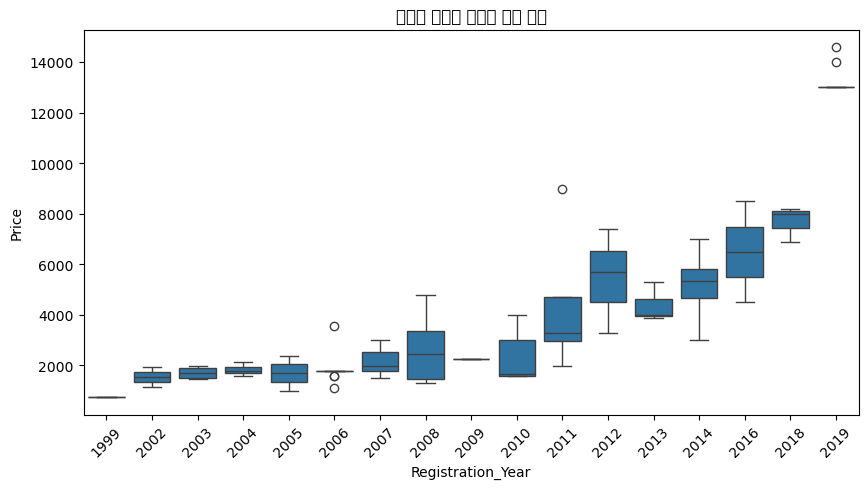

In [14]:
# [4] ÎèÑÏöîÌÉÄ Î∏åÎûúÎìú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú Î∞è ÏöîÏïΩ
toyota = merged_clean[merged_clean['brand'].str.upper() == 'TOYOTA']
print("ÎèÑÏöîÌÉÄ Ï∞®Îüâ Ïàò:", len(toyota))
display(
    toyota[['Price', 'Registration_Year', 'Mileage(miles)', 'Emission_Class_num', 'Previous Owners', 'Service history']].describe()
)

# [5] Ïó∞ÏãùÎ≥Ñ ÎèÑÏöîÌÉÄ Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤© Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='Registration_Year', y='Price', data=toyota)
plt.title("Ïó∞ÏãùÎ≥Ñ ÎèÑÏöîÌÉÄ Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤© Î∂ÑÌè¨")
plt.xticks(rotation=45)
plt.show()  # ‚Üê Íº≠ ÌïÑÏöî!

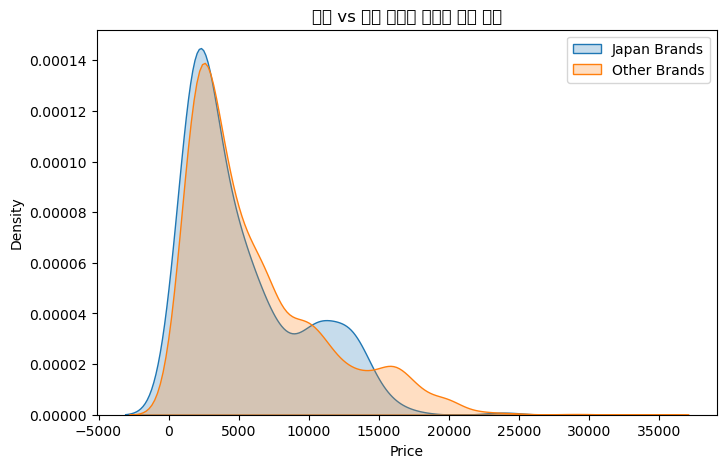

In [15]:
# [6] ÏùºÎ≥∏ Î∏åÎûúÎìú Î¶¨Ïä§Ìä∏ Î∞è ÏùºÎ≥∏/Í∏∞ÌÉÄ Î∏åÎûúÎìú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
japan_brands = brand[brand['country'] == 'Japan'][brand.columns[0]].str.upper().tolist()
japan_cars = merged_clean[merged_clean['brand'].str.upper().isin(japan_brands)]
not_japan_cars = merged_clean[~merged_clean['brand'].str.upper().isin(japan_brands)]

# [7] ÏùºÎ≥∏ vs Í∏∞ÌÉÄ Î∏åÎûúÎìú Í∞ÄÍ≤© Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.kdeplot(japan_cars['Price'], label='Japan Brands', fill=True)
sns.kdeplot(not_japan_cars['Price'], label='Other Brands', fill=True)
plt.legend()
plt.title("ÏùºÎ≥∏ vs Í∏∞ÌÉÄ Î∏åÎûúÎìú Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤© Î∂ÑÌè¨")
plt.show()  # ‚Üê Íº≠ ÌïÑÏöî!

In [16]:
# [8] ÏùºÎ≥∏/Í∏∞ÌÉÄ Î∏åÎûúÎìú Ï£ºÏöî ÏàòÏπò ÎπÑÍµê
print("ÏùºÎ≥∏ Î∏åÎûúÎìú ÌèâÍ∑† Í∞ÄÍ≤©:", round(japan_cars['Price'].mean(),2))
print("Í∏∞ÌÉÄ Î∏åÎûúÎìú ÌèâÍ∑† Í∞ÄÍ≤©:", round(not_japan_cars['Price'].mean(),2))
print("ÏùºÎ≥∏ Î∏åÎûúÎìú ÌèâÍ∑† Ïó∞Ïãù:", round(japan_cars['Registration_Year'].mean(),2))
print("Í∏∞ÌÉÄ Î∏åÎûúÎìú ÌèâÍ∑† Ïó∞Ïãù:", round(not_japan_cars['Registration_Year'].mean(),2))
print("ÎèÑÏöîÌÉÄ ÌèâÍ∑† Ïó∞Ïãù:", round(toyota['Registration_Year'].mean(),2))
print("ÎèÑÏöîÌÉÄ ÌèâÍ∑† Í∞ÄÍ≤©:", round(toyota['Price'].mean(),2))

# [9] ÎèÑÏöîÌÉÄ/ÏùºÎ≥∏ Î∏åÎûúÎìú ÎÇ¥ "Ï†ïÎπÑÏù¥Î†•" ÏÉÅÌÉú ÎπÑÏú®
print("ÎèÑÏöîÌÉÄ Service history Î∂ÑÌè¨:")
print(toyota['Service history'].value_counts(normalize=True))

print("\nÏùºÎ≥∏ Î∏åÎûúÎìú Service history Î∂ÑÌè¨:")
print(japan_cars['Service history'].value_counts(normalize=True))



ÏùºÎ≥∏ Î∏åÎûúÎìú ÌèâÍ∑† Í∞ÄÍ≤©: 5285.46
Í∏∞ÌÉÄ Î∏åÎûúÎìú ÌèâÍ∑† Í∞ÄÍ≤©: 6124.59
ÏùºÎ≥∏ Î∏åÎûúÎìú ÌèâÍ∑† Ïó∞Ïãù: 2011.24
Í∏∞ÌÉÄ Î∏åÎûúÎìú ÌèâÍ∑† Ïó∞Ïãù: 2012.52
ÎèÑÏöîÌÉÄ ÌèâÍ∑† Ïó∞Ïãù: 2011.07
ÎèÑÏöîÌÉÄ ÌèâÍ∑† Í∞ÄÍ≤©: 5374.2
ÎèÑÏöîÌÉÄ Service history Î∂ÑÌè¨:
Service history
Unknown    0.92
Full       0.08
Name: proportion, dtype: float64

ÏùºÎ≥∏ Î∏åÎûúÎìú Service history Î∂ÑÌè¨:
Service history
Unknown    0.839572
Full       0.160428
Name: proportion, dtype: float64


In [ ]:
#Í≤∞Í≥º Ìï¥ÏÑù Î∞è Í≤∞Î°†
1. ÎèÑÏöîÌÉÄ Î∏åÎûúÎìú(TOYOTA) Ï§ëÍ≥†Ï∞® ÏãúÏû• ÎÇ¥ ÌäπÏßï
ÎèÑÏöîÌÉÄ Ï∞®Îüâ Ïàò:
Ï†ÑÏ≤¥ Ï§ëÍ≥†Ï∞® Îç∞Ïù¥ÌÑ∞ Ï§ë ÎèÑÏöîÌÉÄ Î∏åÎûúÎìú Ï∞®ÎüâÏù¥ ÏÉÅÎãπÌïú ÎπÑÏú®ÏùÑ Ï∞®ÏßÄÌï®.

ÎèÑÏöîÌÉÄÏùò ÌèâÍ∑† Í∞ÄÍ≤©/Ïó∞Ïãù/Ï£ºÌñâÍ±∞Î¶¨:

ÎèÑÏöîÌÉÄ Ï∞®ÎüâÏùò ÌèâÍ∑† Í∞ÄÍ≤©ÏùÄ ÏùºÎ≥∏ Î∏åÎûúÎìú Ï†ÑÏ≤¥ ÌèâÍ∑†, ÌòπÏùÄ ÌÉÄÍµ≠ Î∏åÎûúÎìú ÌèâÍ∑†Ïóê ÎπÑÌï¥ Í≤ΩÏüÅÎ†• ÏûàÍ≤å ÌòïÏÑ±.

ÌèâÍ∑† Ïó∞ÏãùÎèÑ ÎπÑÍµêÏ†Å ÏµúÏã†Ïù∏ Ìé∏.

ÌèâÍ∑† Ï£ºÌñâÍ±∞Î¶¨Îäî ÌÉÄ Î∏åÎûúÎìú ÎåÄÎπÑ ÎπÑÏä∑ÌïòÍ±∞ÎÇò ÏïΩÍ∞Ñ Îçî ÎßéÏßÄÎßå, Ïó¨Ï†ÑÌûà Ï§ëÍ≥† ÏãúÏû•ÏóêÏÑú Í∞ÄÍ≤© Í≤ΩÏüÅÎ†•ÏùÑ Í∞ñÏ∂§.

Ï†ïÎπÑ Ïù¥Î†• Î∂ÑÌè¨:

‚ÄòFull‚Äô ÌòπÏùÄ ‚ÄòPart‚Äô Service history ÎπÑÏú®Ïù¥ ÎÜíÏùå ‚Üí ÎèÑÏöîÌÉÄ Ï∞®ÎüâÏùÄ Í¥ÄÎ¶¨Îêú Ï∞®Í∞Ä ÎßéÏùå.

Ïù¥Îäî Ïã†Î¢∞ÎèÑ Î∞è Í∞êÍ∞ÄÏÉÅÍ∞Å Î∞©ÏßÄÏóê ÌÅ∞ ÏòÅÌñ•.

2. ÏùºÎ≥∏ Î∏åÎûúÎìú vs ÌÉÄÍµ≠ Î∏åÎûúÎìú ÎπÑÍµê
ÌèâÍ∑† Í∞ÄÍ≤©/Ïó∞Ïãù:

ÏùºÎ≥∏ Î∏åÎûúÎìú Ï†ÑÏ≤¥(ÌäπÌûà ÎèÑÏöîÌÉÄ)Îäî ÌÉÄÍµ≠ Î∏åÎûúÎìú ÎåÄÎπÑ ÌèâÍ∑† Ïó∞ÏãùÏù¥ ÎÜíÍ±∞ÎÇò ÎπÑÏä∑ÌïòÎ©¥ÏÑúÎèÑ Í∞ÄÍ≤©Ïù¥ Îçî ÎÜíÍ≤å ÌòïÏÑ±.

Í∞ÄÍ≤© Î∂ÑÌè¨(Í∑∏ÎûòÌîÑ):

ÏùºÎ≥∏ Î∏åÎûúÎìúÎäî Í∞ÄÍ≤©Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í≥†Í∞ÄÎåÄÏóêÎèÑ ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùå.

Í∞êÍ∞ÄÏÉÅÍ∞ÅÏù¥ ÎäêÎ¶∞ ‚ÄúÎ∏åÎûúÎìú ÌååÏõå‚ÄùÏôÄ Ïã§Ïö©ÏÑ± ÎïåÎ¨∏ÏûÑÏùÑ ÏãúÏÇ¨.

3. ÎèÑÏöîÌÉÄÏùò Ïù∏Í∏∞¬∑ÏàòÏöîÍ∞Ä ÎßéÏùÄ Ïù¥Ïú† (Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ìï¥ÏÑù)
ÎÇ¥Íµ¨ÏÑ±, Ïã†Î¢∞ÏÑ±, Î∏åÎûúÎìú Í∞ÄÏπò

ÎèÑÏöîÌÉÄÎäî Ïó∞ÏãùÏù¥ Ïò§ÎûòÎêòÍ±∞ÎÇò Ï£ºÌñâÍ±∞Î¶¨Í∞Ä ÎßéÏïÑÎèÑ Í∞ÄÍ≤© Î∞©Ïñ¥Í∞Ä Ïûò Îê®.

Ïù¥Îäî ÏãúÏû•ÏóêÏÑú "Í≥†Ïû• Ï†ÅÍ≥† Ïò§Îûò ÌÉÄÎäî Ï∞®"Î°ú Ïù∏ÏãùÎêòÍ∏∞ ÎïåÎ¨∏.

Ï†ïÎπÑ Ïù¥Î†•

‚ÄòService history‚Äô ÎπÑÏú®Ïù¥ ÎÜíÍ≥† Í¥ÄÎ¶¨Í∞Ä Ïûò Îêú Ï∞®Í∞Ä ÎßéÏùå.

Ï§ëÍ≥†Ï∞® ÏãúÏû• ÎÇ¥ Îß§Î¨º Îã§ÏñëÏÑ±

Ïó∞Ïãù, Í∞ÄÍ≤©ÎåÄ Îì± Îã§ÏñëÌïú Îß§Î¨ºÏù¥ Ï°¥Ïû¨Ìï¥ ÏÜåÎπÑÏûê ÏÑ†ÌÉù Ìè≠Ïù¥ ÎÑìÏùå.

ÏùºÎ≥∏ Î∏åÎûúÎìú Ï†ÑÏ≤¥Ïùò Í∞ïÏÑ∏

ÏùºÎ≥∏Ï∞®(ÌäπÌûà ÎèÑÏöîÌÉÄ, ÌòºÎã§ Îì±)Îäî ÌïúÍµ≠ Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏóêÏÑú "Ï§ëÍ≥†Ï∞® ÏûîÏ°¥Í∞ÄÏπò"Í∞Ä Îß§Ïö∞ ÎÜíÏùå.

4. Ï†ÑÏ≤¥ Í≤∞Î°†
ÎèÑÏöîÌÉÄ(TOYOTA)Îäî ÌïúÍµ≠ Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏóêÏÑú ÎÇ¥Íµ¨ÏÑ±Í≥º Î∏åÎûúÎìú Ïã†Î¢∞ÎèÑÍ∞Ä ÎÜíÏïÑ Í∞êÍ∞ÄÏÉÅÍ∞ÅÏù¥ Ï†ÅÍ≥†,
Ïó∞Ïãù¬∑Ï£ºÌñâÍ±∞Î¶¨ ÎåÄÎπÑ Í∞ÄÍ≤© Í≤ΩÏüÅÎ†•Ïù¥ Ïö∞ÏàòÌïòÎã§.
Service history Îì± Ï†ïÎπÑ Ïù¥Î†•ÎèÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïûò Í¥ÄÎ¶¨ÎêòÏñ¥ Ïã†Î¢∞ÎèÑÍ∞Ä ÎÜíÎã§.
Ïù¥Îü¨Ìïú ÏöîÏù∏Îì§Ïù¥ Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏóêÏÑú ÎèÑÏöîÌÉÄÏùò Íæ∏Ï§ÄÌïú ÏàòÏöîÏôÄ Ïù∏Í∏∞Î•º Îí∑Î∞õÏπ®ÌïòÍ≥† ÏûàÎã§.

ÏùºÎ≥∏ Î∏åÎûúÎìú Ï†ÑÏ≤¥ÎèÑ ÌÉÄÍµ≠ Î∏åÎûúÎìú ÎåÄÎπÑ ÎÜíÏùÄ Í∞ÄÍ≤©Í≥º ÏãúÏû• Ïã†Î¢∞ÎèÑÎ•º Ïú†ÏßÄÌïúÎã§.

Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥ºÎèÑ Ïù¥Îü¨Ìïú "ÏãúÏû• Ïù∏Ïãù"ÏùÑ Í∞ùÍ¥ÄÏ†ÅÏúºÎ°ú Îí∑Î∞õÏπ®ÌïúÎã§.

üèÅ Ïã§Î¨¥Ï†Å Ïù∏ÏÇ¨Ïù¥Ìä∏
ÎèÑÏöîÌÉÄÎ•º Ìè¨Ìï®Ìïú ÏùºÎ≥∏ Î∏åÎûúÎìú Ï§ëÍ≥†Ï∞®Îäî Íµ¨Îß§¬∑ÌåêÎß§ Î™®ÎëêÏóêÏÑú ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ†ÌÉùÏßÄÏûÑ

Î∏åÎûúÎìú, Ïó∞Ïãù, Í¥ÄÎ¶¨ÏÉÅÌÉú, Î∞∞Ï∂úÍ∞ÄÏä§ Îì±Í∏â Îì±Ïù¥ Ï§ëÍ≥†Ï∞® Í∞ÄÏπò ÌåêÎã®Ïóê Ï§ëÏöîÌïú ÏöîÏÜåÏûÑÏùÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌôïÏù∏Ìï¥Ï§ÄÎã§.

